# Data Analyst Professional Practical Exam Submission

In [6]:
import pandas as pd
import numpy as np
product_sales = pd.read_csv('product_sales.csv')
product_sales


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


# Data Validation

Before we can start our exploratory analysis we need to perform data validation on all columns of our new database. Since the table is called product sales any null value on the revenue is actually missing and not a 0. Aknowledeging this enables us to remove all observations with NULL values using a simple command



Having completed the first step, that is avoiding missing observations to skew the rest of the analysis, we need to make sure the data type of each column is what we are looking for.

In [7]:
product_sales.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

### Sales Method


After reviewing the unique categories on the sales method column, we noticed that there are some capture errors and there is more than 3 categories. We cleaned the data so we can perform a better categorical analysis.

In [8]:
product_sales_v1= product_sales.dropna()
product_sales_v1['sales_method'].unique()

array(['Email + Call', 'Call', 'Email', 'em + call', 'email'],
      dtype=object)

In [9]:
category_mapping = {
    'Email + Call': 'Email + Call',
    'Call': 'Call',
    'Email': 'Email',
    'em + call': 'Email + Call',
    'email': 'Email'
}
product_sales_v2 =product_sales_v1.replace({'sales_method': category_mapping})
product_sales_v2['sales_method'].unique()

array(['Email + Call', 'Call', 'Email'], dtype=object)

### years_as_customer


We decided to add a new columns for state codes to facilitate further spatial analysis.

In [10]:
print(product_sales_v2.shape)
product_sales_v2.drop_duplicates()
print(product_sales_v2.shape)
states= product_sales_v2['state'].unique()
print(np.sort(states))

(13926, 8)
(13926, 8)
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [11]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [12]:
product_sales_v2['state_code']= product_sales_v2['state'].apply(lambda x: us_state_to_abbrev.get(x))
product_sales_v2

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,state_code
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,KS
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,WI
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,IL
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi,MS
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia,GA
...,...,...,...,...,...,...,...,...,...
14994,4,Email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,Ohio,OH
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania,PA
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas,KS
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia,WV


We decided to transform years_as_customer to customer_since to perform a better date analysis and to help build latter KPIs.

In [13]:
product_sales_v3= product_sales_v2[product_sales_v2['years_as_customer'] <= 39]
current_year= 2023
foundation_year= 1984
years= np.arange(start= foundation_year, stop= current_year+1, step=1)
customer_years= np.arange(start= 39, stop= -1, step=-1)

year_dict= {}
for A, B in zip(customer_years, years):
    year_dict[A] = B
    

product_sales_v3['customer_since']= product_sales_v3['years_as_customer'].apply(lambda x: year_dict.get(x))
product_sales_v3['customer_since']=  pd.to_datetime(product_sales_v3['customer_since'], format= '%Y')







### customer_id

Removed any whitespace that could be interfering and made a summary table


In [14]:
product_sales_v3['customer_id'] = product_sales_v3['customer_id'].str.replace(" ", "")

In [15]:
sales_by_state= product_sales_v3.groupby('state_code')['revenue'].sum()
print(sales_by_state)

state_code
AK      3199.99
AL     19583.86
AR     10795.38
AZ     27201.18
CA    160893.20
CO     19545.48
CT     16352.65
DE      2780.82
FL     77651.75
GA     43426.41
HI      6525.65
IA     13978.13
ID      6024.39
IL     52649.35
IN     30624.27
KS     11941.95
KY     18961.13
LA     20214.17
MA     25225.59
MD     22789.32
ME      5319.19
MI     44424.81
MN     21352.64
MO     25859.42
MS     13349.49
MT      3585.33
NC     38418.15
ND      2601.93
NE      8441.02
NH      4437.65
NJ     36527.03
NM      7737.07
NV      9587.55
NY     83242.74
OH     48010.94
OK     17701.65
OR     21072.33
PA     51595.35
RI      3948.10
SC     21344.17
SD      3980.69
TN     27694.97
TX    106294.45
UT     11440.50
VA     33749.37
VT      2747.43
WA     30398.39
WI     21989.49
WV      7701.99
WY      3071.81
Name: revenue, dtype: float64


# Data Visualization


## Sales method

I'ts important to know the distribution of the sales method to further understand our company needs and strenghts. We use an histplot to see the distribution of sales by their sales method and we find out that our most prevalent method is sales by Email 

<AxesSubplot: xlabel='sales_method', ylabel='Count'>

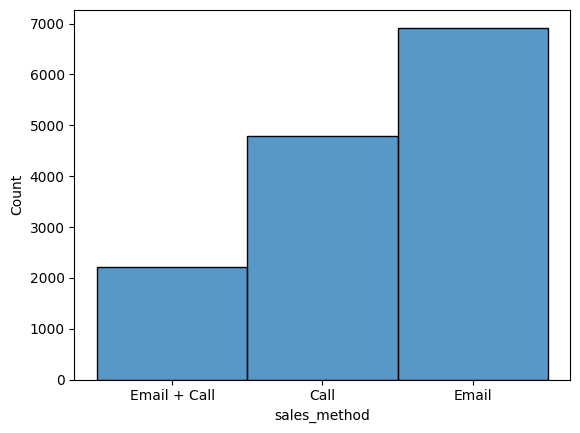

In [17]:
import seaborn as sns
sns.histplot(x= 'sales_method', data= product_sales_v3)

However, while this histogram is helpful to see the composition of our methods, it does not tell the whole story of what is going on in out business. This is why we explore the distribution of products sold grouped by their method.

This reveals a new trend on our data: while our most prevalent sale is made by email, we sell higher quantities if we send the email first and follow up with a call later. We are gonna explore this relationship on further graphs

<AxesSubplot: xlabel='sales_method', ylabel='nb_sold'>

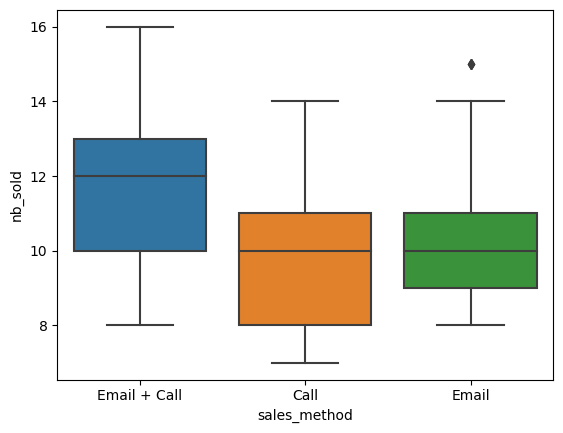

In [19]:
sns.boxplot(x='sales_method',y= 'nb_sold', data=product_sales_v3 )

After looking at graph 2, we know that there is a significant difference between "Email + Call" and other methods. This is the reason we incorporate the sales method legend on the next graph. Graph 3 tells us the story of how our products performa on the first 6 weeks of a new relase. We can observe that we general trend holds up to our previous analysis. 

The email and follow up is still the best method for number of products sold, and it only increases its efectiveness overtime since release.

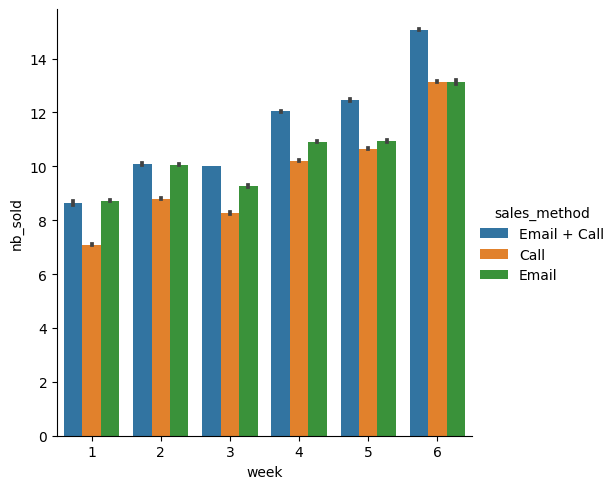

In [20]:
sns.catplot(x= 'week',y='nb_sold',kind='bar',hue= 'sales_method',  data= product_sales_v2)

## Revenue


In [65]:

import plotly.graph_objects as go

fig = go.Figure(go.Choropleth(
    locations=sales_by_state.index,
    z = sales_by_state, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "Revenue",
))
fig.update_layout(
    title_text = 'Revenue by state',
    geo_scope='usa', # limite map scope to USA
    
)

fig.show()

We are going to explore the compostion of our customers by seeing the average revenue they generate. The best way to visualize this is the boxplot, since it give us an idea of the mean, median, quantiles, and outliers. Knowing that the goal of our business is the increase the revenue, finding if the company has key clients can be an effective strategy to make better marketing campaings.

customer_id
00020b38-1ebb-427f-88d1-c60f3c426cfe    184.51
0002aed1-1a1f-4b20-845f-7a4b8cc9977a    237.19
00058065-ed47-4bc0-b74e-6803d0b67644     41.93
0011e7a6-9bda-4624-a115-f39866330cc8    187.15
001552ae-b76e-4070-b01b-b257c3383d8e     99.93
                                         ...  
fff2ac99-1300-4a02-8aa0-ce6440f7ce6f    186.62
fff7398c-87d7-4baa-844c-a93da3d78454     84.71
fff8d038-8306-46a6-8c12-e1416e0dd978    148.33
fffc2b37-eb7f-40fe-91d6-632b0a3ecc36     89.60
fffddf1c-3f29-48a4-99fc-d202869dbd05    156.66
Name: revenue, Length: 13924, dtype: float64


<AxesSubplot: >

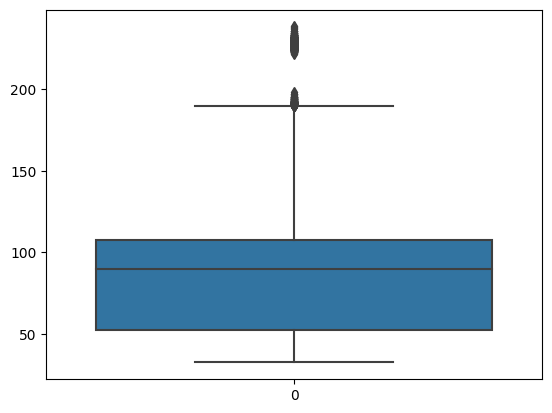

In [18]:
customer_table= product_sales_v3.groupby('customer_id')['revenue'].sum()
print(customer_table)
sns.boxplot( data= customer_table)

After reviewing graph 4 it becomes clear that the company does have some that net the company higher revenue than the 95% of the client base. These are our key customers.

We also need to confirm our previous section findings while keeping a revenue oriented analysis. This is showcase by the Table 1 where email and follow up earns more revenue, as it was expected

In [21]:
product_sales_v3.groupby('sales_method')['revenue'].mean()

sales_method
Call             47.596866
Email            97.127671
Email + Call    183.651233
Name: revenue, dtype: float64

## KPI

In [64]:
quant= customer_table.quantile(q=0.95)
customer_table[customer_table> quant].count()
ratio_topcustomers= customer_table[customer_table> quant].count() / customer_table.count()
ratio_topbuyers= customer_table[customer_table> quant].sum()/customer_table.sum()
ratio_productsold_visit= len(product_sales_v3 ) / product_sales_v3['nb_site_visits'].sum()
ratio_sale_revenue= product_sales_v3['revenue'].sum()/ product_sales_v3['nb_sold'].sum()
values= {'% of key customers': round(ratio_topcustomers, 2), 
         'Proportion of revenue by key customers': round(ratio_topbuyers,2) ,       
         'Average sales by website clicks': round(ratio_productsold_visit,2) ,
         'Average revenue per unit': round(ratio_sale_revenue,2)}
pd.DataFrame.from_dict(values, orient= 'index', columns=[' '])


,
% of key customers,0.05
Proportion of revenue by key customers,0.12
Average sales by website clicks,0.04
Average revenue per unit,9.36


## Customers


In [23]:
table1= product_sales_v3.groupby(['customer_since'])['revenue'].sum()
table1


customer_since
1984-01-01       186.90
1985-01-01       133.98
1986-01-01       227.85
1987-01-01       267.22
1988-01-01       359.60
1989-01-01       599.76
1990-01-01       631.85
1991-01-01       322.37
1992-01-01       558.79
1993-01-01       577.14
1994-01-01       466.99
1995-01-01       632.39
1996-01-01      1340.11
1997-01-01      1712.83
1998-01-01      1567.13
1999-01-01      2203.23
2000-01-01      1258.59
2001-01-01      3689.18
2002-01-01      3040.60
2003-01-01      4633.03
2004-01-01      4866.07
2005-01-01      6739.27
2006-01-01      7456.22
2007-01-01      9835.15
2008-01-01     12613.51
2009-01-01     13107.66
2010-01-01     19675.95
2011-01-01     24605.07
2012-01-01     27926.58
2013-01-01     33563.97
2014-01-01     41648.38
2015-01-01     50471.89
2016-01-01     59964.39
2017-01-01     79033.35
2018-01-01     96864.16
2019-01-01    116106.52
2020-01-01    143178.56
2021-01-01    175305.90
2022-01-01    223172.97
2023-01-01    137445.21
Name: revenue, dtype: flo

<AxesSubplot: xlabel='customer_since', ylabel='revenue'>

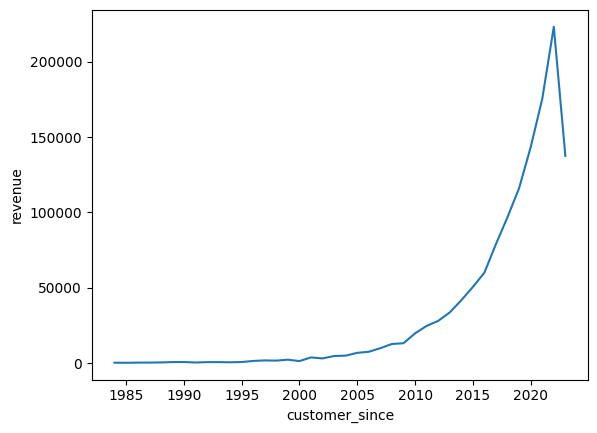

In [24]:
sns.lineplot(data=table1)

We can see that the revenue of the first 6 weeks since product launch is considerably higher from newer clients. This could be due to the nature of our product and the state of the industry, but it could also mean we need the marketing team to work on a client retention program.

In [41]:
print(len( product_sales_v3 ))
unique= product_sales_v3['customer_id'].unique()
print( len(unique))

13924
13924


Upon further examination we can see that in fact, since this database is about the first 6 weeks since product launch, we do not have any repeated clients. Still, the reccomendation for a client retention program holds, and could be more specific only if we get our hands in a database suitable to build customer retention and satisfaction metrics.